plot chromHMM

In [1]:
# python modules
import copy
import re
import random
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis


In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"


In [4]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'E14':'mouse',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'E14':['chr%s' % (i) for i in range(1, 20)] + ['chrX', 'chrY'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}


In [5]:
agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$+tSUV',
                  'LKH':'Linker histone1',
                  'Ki67':'Ki67',
                  'FUS':'FUS',
                  'Mg':'Magnesium',
                  'Ca':'Calcium'}


In [10]:
### set data information
rlen_path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'

rlen_fnames = ['E14_NCP_sp_%d_1rep_E14_NCP_sp_%d_1rep_rlen.txt' % (i, i) for i in range(10)]
labels = ["E14-NCP-sp-%d" % (i) for i in range(10)]

In [11]:
### load rlen file
rlen_counts = [load_file.read_rlen_file (fname) for fname in rlen_fnames]

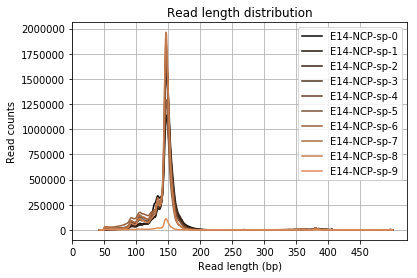

In [12]:
### plot rlen distribution
colors = np.linspace(0.01, 0.7, num=len(rlen_counts))
alphas = np.linspace(0.3, 1, num=len(rlen_counts))[::-1]
cmap = mpl.cm.get_cmap("copper")

plot_rlen_dist (rlen_counts,
                colors=colors,
                alphas=alphas,
                labels=labels,
                save=False,
                note='')
